## **Tercera Entrega del Proyecto Final de Data Science**
---

####  **Presentación del problema** 

El riesgo de crédito se refiere a la probabilidad de pérdida debido al incumplimiento en los pagos de cualquier tipo de deuda por parte de un deudor. Técnicamente, si el deudor no cumple con sus obligaciones, se dice que el mismo *entró en default.* El análisis de riesgo de crédito es de fundamental importancia para las instituciones crediticias, puesto que el hecho de estimar las *Probabilidades de Default (PD)* de sus prestatarios les permite no solo establecer las condiciones del crédito, sino que también calcular el nivel de reservas que deben tener para afrontar las eventuales pérdidas ocasionadas por el default de sus prestatarios. En el caso de los bancos, tales niveles de reservas deben satisfacer distintas regulaciones tanto de organismos naciones como internacionales, de acuerdo al caso.   

---

#### **Objetivos del proyecto** 

El presente proyecto tiene por objetivo realizar un análisis de riesgo de crédito para un banco. Mediante la exploración de las distintas características de los prestatarios y del préstamo, se buscan reconocer aquellas variables o relaciones entre variables más significativas para la ocurrencia (o no) del incumplimiento de pago. A partir de tal análisis, el objetivo último consiste en la elaboración de distintos modelos de regresión logística que permitan estimar, tanto con precisión como con robustez, la probabilidad de default del cŕedito otorgado. En otras palabras, se busca un compromiso óptimo entre el sesgo y la varianza del modelo, pretendiendo que el mismo generalice correctamente a datos que no haya visto con anterioridad. 

---


#### **Conformación del equipo de trabajo** 

El grupo de investigación está conformado por Matías Larsson, María Mercedes Vazzano y Nicolás Mirkin. 

---


#### **Indicación de la fuente del dataset**

El siguiente conjunto de datos contiene columnas que simulan datos de crédito de un banco:

https://www.kaggle.com/datasets/laotse/credit-risk-dataset

Dicha base de datos se eligió debido a la cantidad significativa de registros que presenta, como así también por la excelente calidad y diversidad de los mismos. Se remarca que la base de datos contiene la variable target a predecir bajo el nombre de ***loan_status***.

---

#### **Índice de contenidos**

1. Descripción general del dataset  
2. Data Wrangling
3. Exploratory Data Analysis:

    a. Análisis Univariado

    b. Análisis Bivariado

    c. Análisis Multivariado
4. Análisis de Componentes Principales (PCA)
5. Feature Engineering y Preparación Final del Dataset
6. Modelos de clasificación

    a. KNN
    
    b. Árboles de decisión

    c. Random Forest
    
    d. Regresión logística
    
    e. SVM

    f. Comparación de modelos óptimos

    g. Mejora del modelo óptimo: Gradient Boosting
---



### **1. Descripción general del dataset**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import plotly.express as px
sns.set(font_scale=1)

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Al ejecutar en Google Colab, para poder cargar la librería function_definitions se debe subir function_definitions.py en /content/sample_data/
import sys
sys.path.append('/content/sample_data/')
from function_definitions import createdummies, get_accuracy, measure_errors, measure_error_depth

In [4]:
df = pd.read_csv('/content/sample_data/credit_risk.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


##### Descripción de las variables

| Nombre de la variable | Descripción |
|-----------------------|-------------|
| person_age | Edad |
| person_income | Ingreso anual |
| person_home_ownership | Fuente de financiación del hogar |
| person_emp_length | Antecedente laboral en años |
| loan_intent | Finalidad del préstamo |
| loan_grade | Tipo de préstamo asociado al riesgo crediticio |
| loan_amnt | Monto del préstamo |
| loan_int_rate | Tasa de interés del préstamo en % |
| loan_status | Estado del préstamo (0 es "no default", 1 es "default"). Variable target a predecir. |
| loan_percent_income | Cuánto representa el préstamo respecto al ingreso anual |
| cb_person_default_on_file | "Y" si ha defaulteado algún préstamo previamente, "N" nunca ha defaulteado |
| cb_person_cred_hist_length | Historial crediticio en años |

##### Forma del dataframe

In [5]:
df.shape

(32581, 12)

Se cuenta con 32.581 registros y 12 variables, entre las cuales se encuentra la variable target a predecir: ***loan_status***.

##### Tipos de datos y totalidad de registros por columnas

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


Del total de las 12 variables de la base de datos, se puede ver que 8 de ellas corresponden a variables numéricas y 4 a variables categóricas. Asimismo, existen ciertos valores nulos que deberán tratarse luego.

##### Principales estadísticas

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32581.0,27.734600,6.348078,20.00,23.00,26.00,30.00,144.00
person_income,32581.0,66074.848470,61983.119168,4000.00,38500.00,55000.00,79200.00,6000000.00
person_emp_length,31686.0,4.789686,4.142630,0.00,2.00,4.00,7.00,123.00
loan_amnt,32581.0,9589.371106,6322.086646,500.00,5000.00,8000.00,12200.00,35000.00
loan_int_rate,29465.0,11.011695,3.240459,5.42,7.90,10.99,13.47,23.22
loan_status,32581.0,0.218164,0.413006,0.00,0.00,0.00,0.00,1.00
loan_percent_income,32581.0,0.170203,0.106782,0.00,0.09,0.15,0.23,0.83
cb_person_cred_hist_length,32581.0,5.804211,4.055001,2.00,3.00,4.00,8.00,30.00




---


### **2. Data Wrangling**

##### **Identificación de outliers:** 
A partir del análisis estadístico de la sección anterior, es clara la presencia de outliers en la variable *person_age* (max = 144 años), al igual que en *person_emp_length* (max = 123 años). Se pueden verificar más claramente tales outliers mediante *boxplots*:

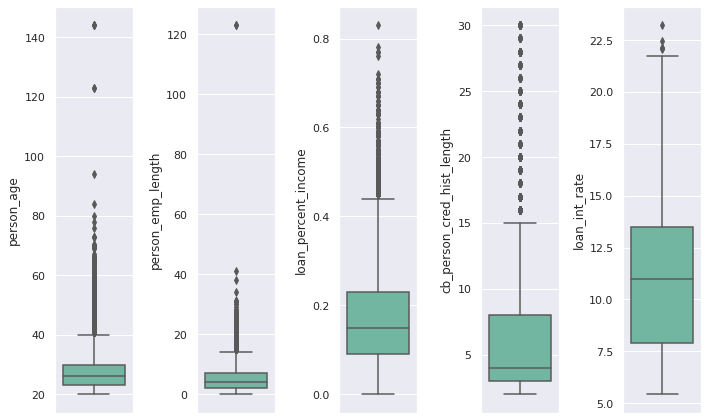

In [8]:
features = ['person_age','person_emp_length','loan_percent_income','cb_person_cred_hist_length','loan_int_rate']
 
plt.figure(figsize=(10,6))
i = 0
for feature in features:  
    plt.subplot(1, len(features), i + 1)
    sns.boxplot(y=df[feature], palette="Set2", orient='v')
    plt.tight_layout()
    i += 1
plt.show()

Notar que en este análisis de outliers se omitieron los features *'person_income'* y *'loan_amnt'* puesto que se consideran irrelevantes por separado. Se enfatiza que lo importante es la relación entre ambos mediante el feature *'loan_percent_income' (LPI)*. Este punto será estudiado en detalle más adelante, cuando se realice un análisis de las correlaciones y las componentes principales de la base de datos.

##### **Tratatamiento de outliers:**

##### Se eliminan los outliers identificados en las variables *person_age* y *person_emp_length*. Debido a la mayor densidad de los datos en las demás variables, no se consideran otros outliers más allá de los antes mencionados.

In [9]:
data = df.copy()
data = data.drop(data.loc[data['person_age'] > 120].index)
data = data.drop(data.loc[data['person_emp_length'] > 120].index)

##### **Tratatamiento de valores nulos:**

In [10]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3115
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Notar que hay dos categorías con valores nulos: *loan_int_rate* y *person_emp_length*. 
Dado que los valores nulos representan una cantidad de datos significativa del dataset (alrededor del 9.5% en el caso de *loan_int_rate* y del 2.9% en el caso de *person_emp_length*) se decidió no eliminarlos, sino que reemplazarlos de acuerdo a algún criterio.
Analizando las estadísticas de estas categorías se puede ver que el desvío estándar no es del todo bajo, especialmente en la variable *person_emp_length*, por lo que reemplazar por la media de los datos completos tampoco es la mejor opción.

In [11]:
data['loan_int_rate'].describe()

count    29459.000000
mean        11.011529
std          3.240497
min          5.420000
25%          7.900000
50%         10.990000
75%         13.470000
max         23.220000
Name: loan_int_rate, dtype: float64

In [12]:
data['person_emp_length'].describe()

count    31679.000000
mean         4.782064
std          4.034948
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         41.000000
Name: person_emp_length, dtype: float64

Para solucionar el problema de la desviación estándar, el criterio para reemplazar los valores faltantes en la tasa de interés será calcular la tasa de interés promedio para cada categoría de riesgo crediticio (cuanto peor es la calificación, mayor es la tasa) y reemplazar dicho valor medio de acuerdo al *loan_grade* del registro faltante. A continuación se muestra que la desviación de la media es menor cuando se separan los datos según su calificación, por lo que esta aproximación será más fiel a los valores reales de dataset.

In [13]:
grades = ['A','B','C','D','E','F','G']
for grade in grades:
  a = data['loan_int_rate'][data['loan_grade']==grade].std()
  print('Categoría {}: std = {}'.format(grade,a))

Categoría A: std = 1.0440070876020524
Categoría B: std = 0.9094778406576555
Categoría C: std = 0.9619992610956877
Categoría D: std = 1.1112610110095575
Categoría E: std = 1.323164053285894
Categoría F: std = 1.3755242254598445
Categoría G: std = 1.0668303254538685


In [14]:
indices_null_int = data[data['loan_int_rate'].isnull()].index.tolist().copy()
mean_int_rate_by_grade=data.groupby('loan_grade')['loan_int_rate'].mean()
for index_int in indices_null_int:
    grade=data['loan_grade'][index_int]
    data['loan_int_rate'][index_int]=mean_int_rate_by_grade[grade]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


En cuanto a los valores nulos de la variable *person_emp_length*, se realizará un procedimiento similar, esto es, se verá cuál es el valor medio de dicha categoría de acuerdo a la edad del deudor y se reemplazarán los registros acorde a este criterio. Esto se hace asumiendo que existe una correlación positiva entre la edad de la persona y los años de su historial laboral, lo cual será demostrado más adelante.  

In [15]:
indices_null_emp_length = data[data['person_emp_length'].isnull()].index.tolist().copy()
mean_emp_length_by_age=data.groupby('person_age')['person_emp_length'].mean()
for index_emp in indices_null_emp_length:
    age=data['person_age'][index_emp]
    data['person_emp_length'][index_emp]=mean_emp_length_by_age[age]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [16]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Luego de limpiar la base de datos, la misma ya se encuentra en condiciones para ser explorada en detalle. Con tal fin, primero se analizarán las distribuciones de cada variable por separado, luego relaciones de a pares y finalmente vínculos más complejos que relacionen múltiples variables de manera simultánea. 



---



---


### **3. Exploratory Data Analysis:**
  
###  **a. Análisis univariado**

En primer lugar, es conveniente estudiar cómo se encuentra distribuida la variable ***target*** a predecir: *'loan_status'*. Por tal motivo, a continuación se presentan dos visualizaciones distintas de dicha variable.

In [17]:
data.loan_status.value_counts()

0    25467
1     7107
Name: loan_status, dtype: int64

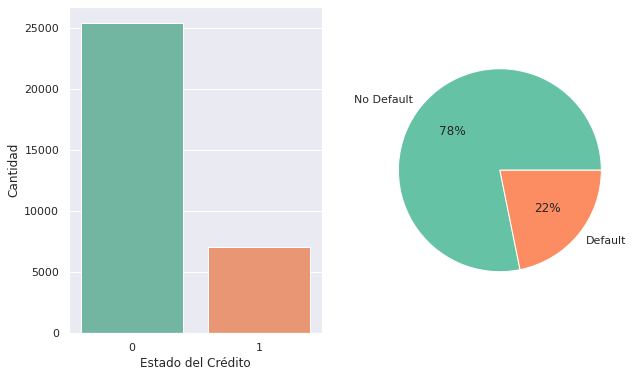

In [18]:
sns.set(rc={'figure.facecolor':(0,0,0,0)})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
sns.countplot(x='loan_status', data=data,palette='Set2',ax=ax1)
ax1.set_xlabel("Estado del Crédito")
ax1.set_ylabel("Cantidad")
ax2.pie(data.loan_status.value_counts(), labels = ['No Default', 'Default'], colors = [sns.color_palette('Set2')[0],sns.color_palette('Set2')[1]], autopct='%.0f%%')
plt.show()

**Observación:** El  22% de los tomadores de créditos termina defaulteando.

Más allá de la variable ***target***, también es relevante analizar cómo se comportan el resto de las distribuciones de las variables numéricas relevantes que componen al dataset. 

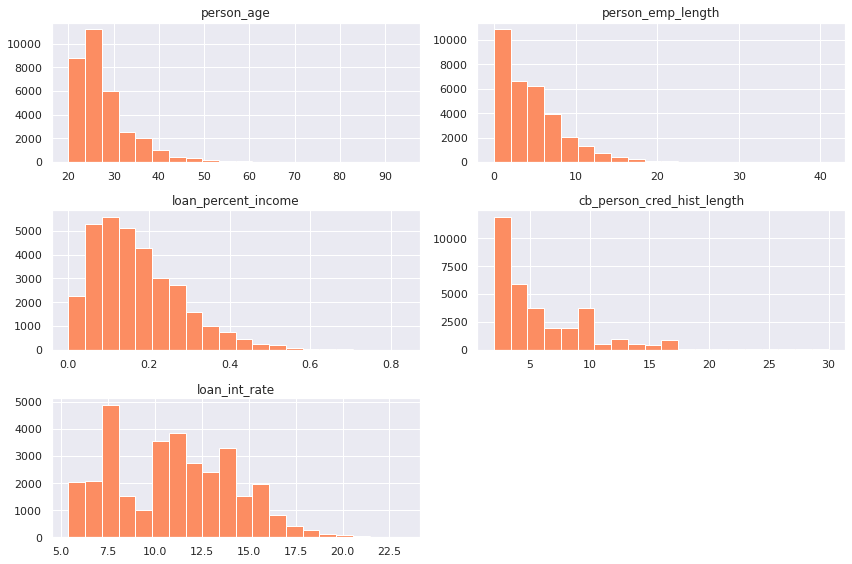

In [19]:
data[features].hist(figsize=(12, 8), bins=20, color = sns.color_palette('Set2')[1])
plt.tight_layout()
plt.show()

**Observaciones:** 
- Los tomadores de crédito de la base de datos son mayormente personas jóvenes.
- Frecuentan tener menos de 10 años de empleo.
- La mayor parte toma creditos en torno al 10% del monto de su ingreso anual.
- Las tasas de interes son dispares y no muestran una distribución normal. Las mismas exhiben una gran amplitud de valores, entre 5% y 23% aproximadamente. Esto seguramente esté asociado a una asignacion de *'tasas personalizadas'* de acuerdo al perfil de cada deudor.

En cuanto a la distribución de las variables categóricas, a continuación se presenta un análisis detallado de las mismas en relación a la variable target ***loan_status***.



---


###  **b. Análisis bivariado**

Distribución de frecuencias de las variables categóricas con respecto a la variable target.

Realizamos agrupaciones:

In [20]:
categorical = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
frec_cat=[]
for categ in categorical:
    frec_catx = data.groupby(categ)['loan_status'].value_counts(normalize=True)
    frec_catx = frec_catx.rename('Percent').reset_index()
    frec_cat.append(frec_catx)

Hacemos un barplot para las frecuencias de las variables categóricas que tenemos, de acuerdo al valor del target. 

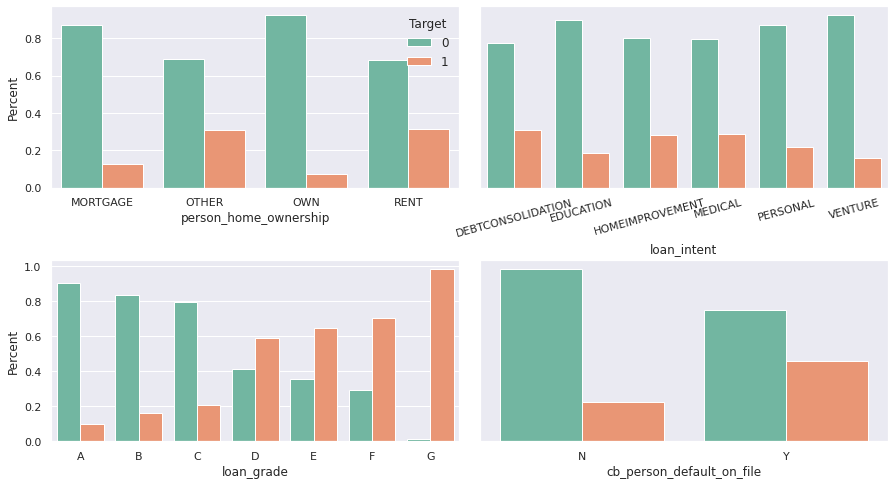

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15,8))
axes = axes.flatten()
i = 0
for categ in categorical:  
    sns.barplot(x=categ,y='Percent',hue='loan_status',data=frec_cat[i],ax=axes[i],palette = 'Set2')
    i += 1
axes[1].tick_params(axis='x', rotation=15) 
axes[0].legend(title='Target',loc='best',framealpha=0,fontsize=12)
axes[1].get_yaxis().set_visible(False)
axes[3].get_yaxis().set_visible(False)
[axes[i].get_legend().remove() for i in range(1,len(categorical))]
plt.subplots_adjust(wspace=0.05,hspace=0.40)
plt.show()

**Observaciones:**
- Se advierte un mayor cumplimiento tanto en los propietarios de hogares como en los que poseen viviendas amortizables, en comparacion con los que rentan su hogar.
- Se observa mayor cumplimiento en créditos destinados a educación y a emprendimientos de negocios.
- Cuanto peor es la califación de riesgo crediticio, mayor es la probabilidad de default. 
- Además, se ve un mayor cumplimiento en aquellos que no tienen registrado un default previo.

#### **¿Qué otras relaciones se pueden encontrar entre las distintas variables?**
Esta pregunta es fundamental puesto que nos brindará importantes insights para elaborar nuestros modelos de clasificación. Para abordar esta pregunta, será de mucha utilidad realizar un análisis de las correlaciones presentes en la base de datos. 

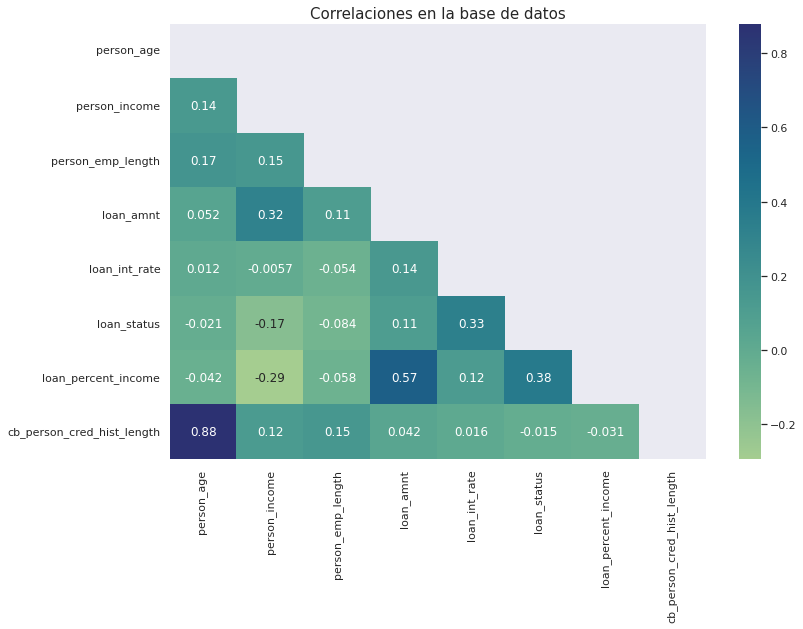

In [22]:
plt.figure(figsize=(12, 8))

data_corr = data.corr()
mask = np.triu(np.ones_like(data.corr(),dtype=bool))

sns.heatmap(data_corr, mask=mask,
            xticklabels = data_corr.columns.values,
            yticklabels = data_corr.columns.values,
            annot = True,cmap='crest');
plt.title('Correlaciones en la base de datos', fontsize = 15)
plt.show()

**Observaciones:**

1. La correlación más importante (C=0.88) ocurre entre el historial crediticio y la edad del prestatario, lo cual es completamente lógico porque a menor edad menor probabilidad de haber accedido a un cŕedito en el pasado. Esto da cuenta de cierta redundancia en la base de datos. 
2. La variable ***target*** está mayormente correlacionada con la variable ***loan_percent_income (LPI)*** (C=0.38) y con la tasa de interés (C=0.32).
3. Las variables LPI, el ingreso de la persona y el monto del crédito tomado están altamente relacionadas entre sí. Este es uno de los argumentos por los cuales se focaliza exclusivamente en la variable LPI, ya que contempla el ratio entre el ingreso y el monto del préstamo. Notar la correlación negativa entre LPI y el ingreso del prestatario (C=-0.29). Esto significa que a cuanto mayor ingreso, menor LPI.
4. La edad del tomador de deuda y su historial laboral en años se encuentran levemente correlacionados (C=0.17), tal como se asumió a la hora de corregir los valores nulos. Asimismo, dicho historial laboral y el ingreso presentan una correlación positiva no despreciable (C=0.15).   

En aras de explorar en mayor profundidad las correlaciones encontradas, a continuación se presentan diversos gráficos bivariados explorando la relación entre las variables correspondientes:

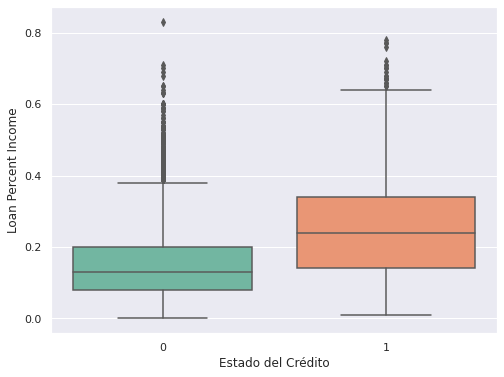

In [23]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.boxplot(x='loan_status', y='loan_percent_income', data=data, palette = 'Set2')
plt.ylabel("Loan Percent Income")
plt.xlabel("Estado del Crédito")
plt.show()

**Observación:** Es evidente que el target positivo (default) está asociado con un mayor LPI. Éste comportamiento resulta esperable, ya que a mayor carga (relativa) de la deuda sobre la capacidad de generacion de ingresos, es lógico que se presenten mayores dificultades para devolver el crédito. 




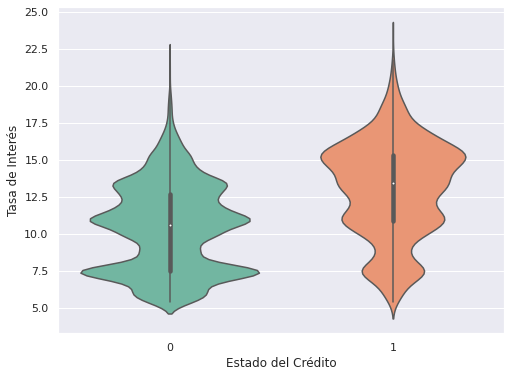

In [24]:
plt.rcParams['figure.figsize'] = (8, 6)
sns.violinplot(x='loan_status', y='loan_int_rate', data=data, palette = 'Set2')
plt.ylabel("Tasa de Interés")
plt.xlabel("Estado del Crédito")
plt.show()

**Observación:** Se puede ver cómo el target positivo (default) está asociado con una mayor tasa de interés. Aquí hay que ser más cautos sobre la relacion de causalidad ya que el pago de una tasa mayor puede resultar de una calificación negativa del deudor al momento de tomar el préstamo. Pero a su vez, una mayor tasa de interés eleva la carga de la deuda y el esfuerzo de repago del crédito.

---

### **3c. Análisis multivariado** 
A continuación, se procede con el estudio de relaciones más complejas entre múltiples variables. Para tal fin, se realiza un pairplot entre los features numéricos que se consideran más relevantes para el análisis, discriminando de acuerdo al valor de la variable target *loan_status*.

<Figure size 1080x720 with 0 Axes>

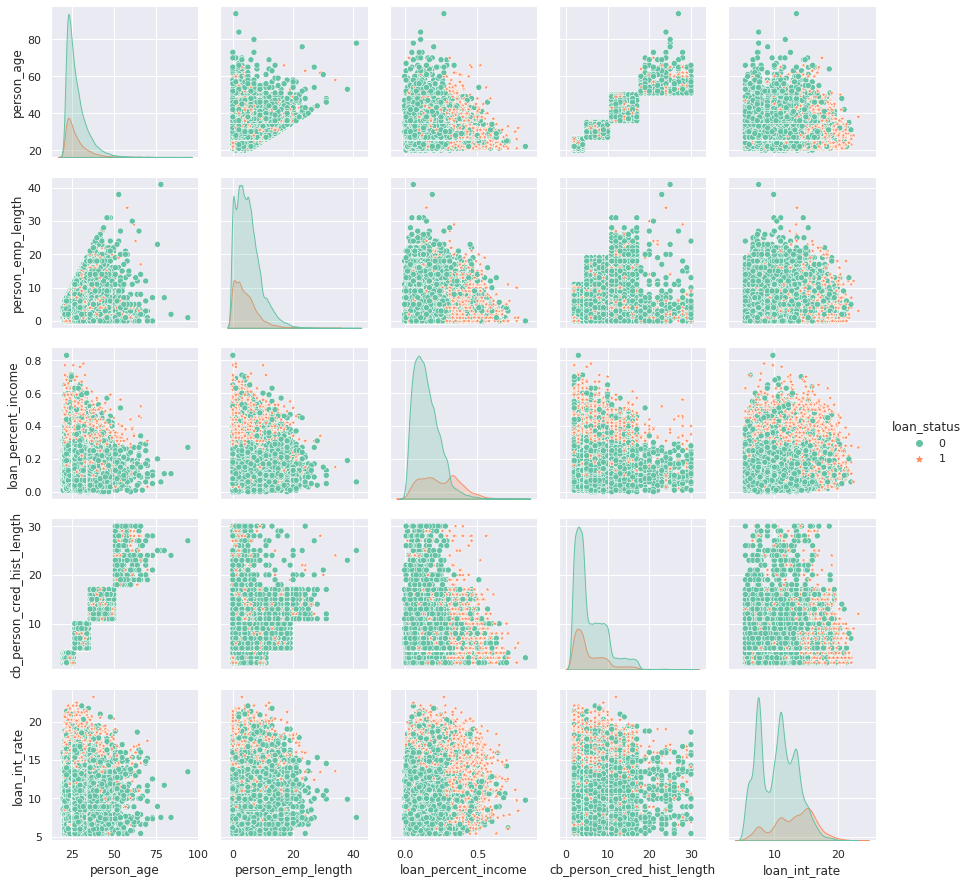

In [25]:
features = ['person_age','person_emp_length','loan_percent_income','cb_person_cred_hist_length','loan_int_rate','loan_status']
plt.figure(figsize=(15,10))
ax=sns.pairplot(data[features],hue='loan_status', palette = 'Set2',markers=["o", "*"])
plt.show()

**Observaciones:**

*   Nuevamente, se puede ver que existe una relación clara entre la variable *loan_percent_income* (LPI) y el estado del crédito (*loan_status*), independientemente de cuál sea la otra variable bajo consideración. En concreto, cuanto mayor es el LPI, mayor es la probabilidad de default. Además, parecería haber un valor crítico de LPI alrededor de 0.25 en todos los paneles. 
*   Se observa una correlación inversa entre la edad del deudor y el LPI, en tanto que las personas jóvenes son las que concentran el mayor LPI. En cambio, en la medida en que aumenta la edad del deudor, el LPI tiende a ser menor y por ende también es menor la probabilidad de default. 
*   Como ya se ha mostrado en el gráfico de correlaciones, la edad está fuertemente relacionada con los años de historial crediticio (*cb_person_cred_hist_length*), pero no muestra una relación con el estado del crédito (*loan_status*) .
   



#### **Análisis multivariado incluyendo variables categóricas:**

**¿Cómo se comporta la tasa de interés y el porcentaje de default en función de la calificación de riesgo crediticio?**

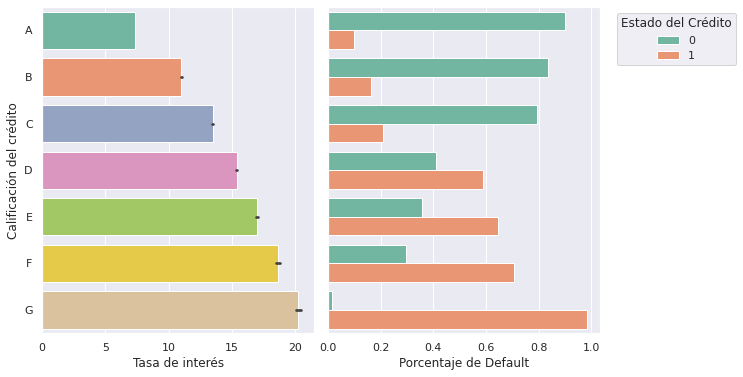

In [26]:
data_by_loan_grade_status = data.groupby(['loan_grade'])['loan_status'].value_counts(normalize=True)
data_by_loan_grade_status= data_by_loan_grade_status.rename('Percent').reset_index()

fig, axes = plt.subplots(1, 2, figsize=(10,6))
axes = axes.flatten()
sns.barplot(y='loan_grade',x='loan_int_rate',data=data,palette='Set2',order=['A','B','C','D','E','F','G'],ax=axes[0])
sns.barplot(x='Percent',y='loan_grade',hue='loan_status',data=data_by_loan_grade_status,palette='Set2',order=['A','B','C','D','E','F','G'],ax=axes[1])
axes[1].get_yaxis().set_visible(False)
axes[0].set_ylabel("Calificación del crédito",fontsize=12)
axes[0].set_xlabel("Tasa de interés",fontsize=12)
axes[1].set_xlabel("Porcentaje de Default",fontsize=12)
axes[1].legend(bbox_to_anchor=(1.04,1), loc="upper left",title='Estado del Crédito')
plt.subplots_adjust(wspace=0.05,hspace=0.15)
plt.show()

* La tasa de interés aumenta a medida que empeora la calificación del crédito (a mayor riesgo, mayor interés). 
* La probabilidad de default aumenta a medida que aumenta la tasa de interés y empeora la calificación de riesgo crediticio.

**¿Existe alguna relación entre la edad del deudor, el propósito del crédito y la probabilidad de default?**

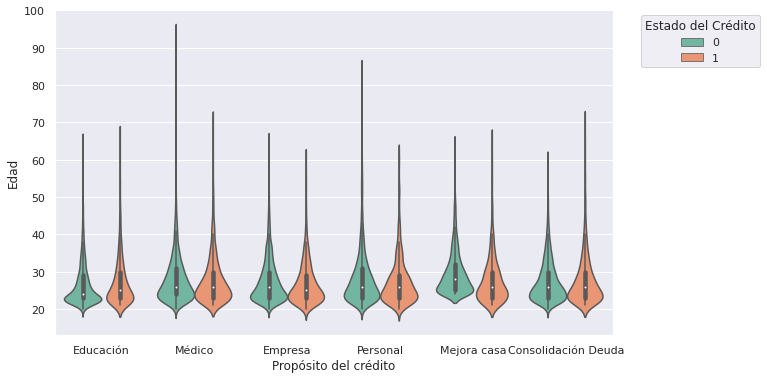

In [27]:
plt.figure(figsize=(10,6))
ax = sns.violinplot(data=data, x='loan_intent',y='person_age',hue='loan_status',palette="Set2")
ax.set_xlabel("Propósito del crédito",fontsize=12)
ax.set_ylabel("Edad",fontsize=12)
ax.set_xticklabels(['Educación','Médico','Empresa','Personal','Mejora casa','Consolidación Deuda'])
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left",title='Estado del Crédito')
plt.show()

**Observaciones:**

*   Las personas jóvenes suelen pedir más préstamos para educación que para asuntos médicos o remodelación de sus hogares.
*   Las personas que defaultean en préstamos para mejoras de sus hogares son mayormente jóvenes.
* Las personas de mayor edad que piden préstamos los hacen para fines médicos o personales y cumplen con los pagos.



**¿Cómo se modifica el *loan_percent_income (LPI)* de acuerdo al estado de propiedad del deudor?**

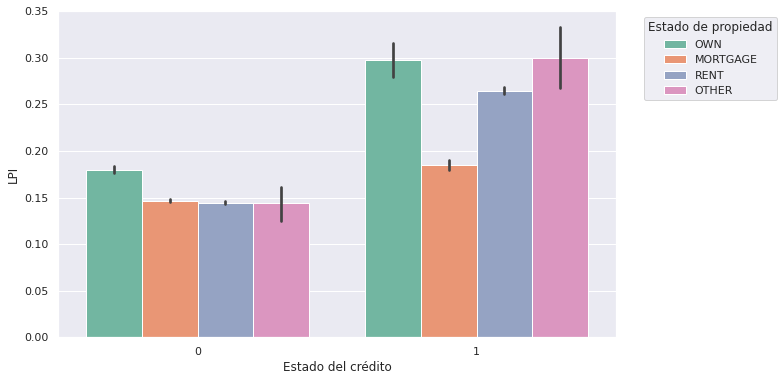

In [28]:
plt.figure(figsize=(10,6))
ax=sns.barplot(data=data,x='loan_status', y='loan_percent_income',hue='person_home_ownership',palette='Set2')
ax.set_xlabel("Estado del crédito",fontsize=12)
ax.set_ylabel("LPI",fontsize=12)
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left",title='Estado de propiedad')
plt.show()

**Observaciones:**
* Las personas que son dueñas de propiedad suelen poseer un mayor LPI que aquellas que alquilan o pagan una hipoteca. Esto tiene sentido puesto que no tienen que utilizar parte de su sueldo para pagar el alquiler o la hipoteca. 
* En todos los casos, un mayor LPI está asociado a una mayor probabilidad de default.
* Dentro de los deudores que entran en default, es interesante notar que el valor de LPI es notablemente menor para quienes tienen una hipoteca. Esto podría tener que ver con que aquellos que poseen su propiedad comprometida, tienden a incurrir en menores riesgos crediticios. 

**¿Cuántos préstamos se otorgan en función de su calificación de riesgo y el propósito del mismo?**

<Figure size 720x432 with 0 Axes>

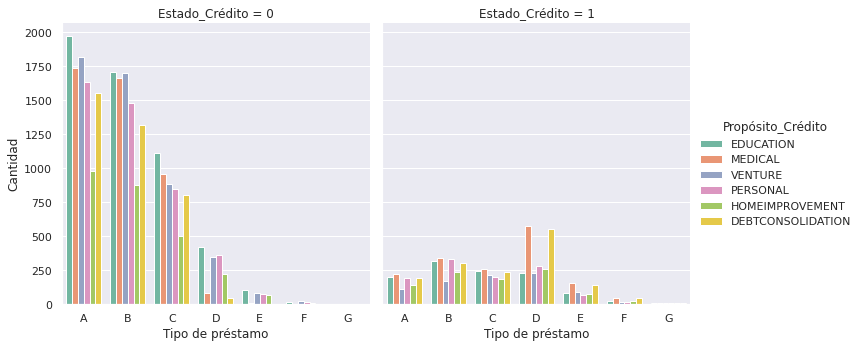

In [29]:
data_p = data.copy()
data_p.rename(columns={'loan_intent':'Propósito_Crédito','loan_status':'Estado_Crédito'},inplace=True)

plt.figure(figsize=(10,6))
ax=sns.catplot(x='loan_grade',col='Estado_Crédito', data=data_p, kind='count', palette = 'Set2',order=['A','B','C','D','E','F','G'],hue='Propósito_Crédito')
ax.set_axis_labels('Tipo de préstamo', 'Cantidad',fontsize=12)
plt.show()

**Observaciones:**

* A medida que el riesgo crediticio es mayor, se otorgan menor cantidad de préstamos. 
* En las categorías A, B y C (menor riesgo crediticio) la cantidad de personas que cumple con los pagos es mucho mayor a la que no lo hacen.
* La categoría que tiene mayor cantidad de personas que no pagan es la D (especialmente para fines médicos y de consolidación de deuda). Esto podría deberse a que los que están en las categorías con menores riesgos en general no entran de default, mientras que los céditos con mayor riesgo son otorgados con mucha menor frecuencia. 
* En todas las calificaciones de riesgo crediticio, los casos más frecuentes de default parecen estar dados por la consolidación de la deuda. Asimismo, en el siguiente plot es interesante notar cómo los préstamos de mayor riesgo son usualmente otorgados para fines de financiamiento en empresas: 


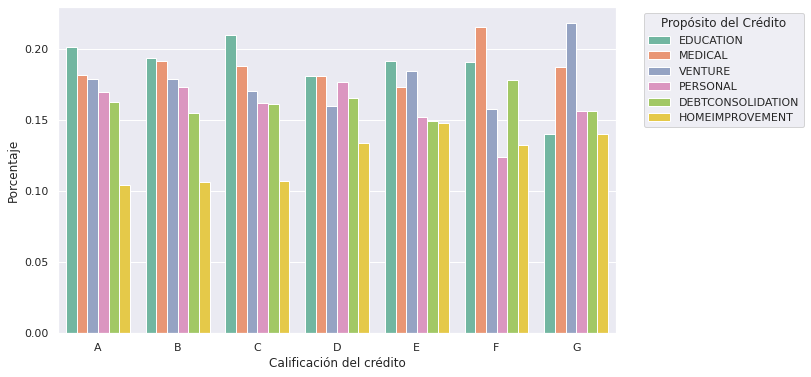

In [30]:
data_by_loan_grade_intent = data.groupby('loan_grade')['loan_intent'].value_counts(normalize=True)
data_by_loan_grade_intent = data_by_loan_grade_intent.rename('Percent').reset_index()

fig, axes = plt.subplots(1, 1, figsize=(10,6))
axes=sns.barplot(x='loan_grade',y='Percent',hue='loan_intent',data=data_by_loan_grade_intent,palette='Set2')
axes.legend(bbox_to_anchor=(1.04,1), loc="upper left",title='Propósito del Crédito')
axes.set_xlabel("Calificación del crédito",fontsize=12)
axes.set_ylabel("Porcentaje",fontsize=12)
plt.show()

---

### **4. Análisis de Componentes Principales (PCA)**

El *Análisis de Componentes Principales* (PCA) es un método de aprendizaje automático no supervisado, útil para reducir la dimensionalidad de los datos. En el presente trabajo, se utilizará dicho método para explorar la redundancia de información en los features numéricos de nuestra base de datos. 

Como ya se argumentó previamente, las variables *'loan_amnt'* y *'person_income'* están inversamente relacionadas a través del ratio *'loan_percent_income'*. Además, la variable *'person_age'* está fuertemente correlacionada con el feature *'cb_person_cred_hist_length'* (cor=0.88, ver gráfico de correlaciones). Por ende, considerando que con nuestros análisis previos ya nos fue posible identificar cierto grado de *redundancia* en nuestra base de datos original, es de esperar que el método de PCA sea capaz de reducir la dimensionalidad eficientemente y que tal reducción esté relacionada con la redundancia previamente identificada. 

En aras de explorar este punto, a continuación se explora el método de PCA en detalle: 

In [31]:
num_features = ['person_age','person_emp_length','loan_percent_income','cb_person_cred_hist_length','loan_int_rate','person_income','loan_amnt']

X = data.copy()
y = X.pop('loan_status')
X = X.loc[:, num_features]

# Normalizamos los datos
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [32]:
from sklearn.decomposition import PCA

# Creamos componentes principales
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convertimos a dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.733496,-1.255309,-0.428814,-0.041390,-0.841476,-0.021683,-0.095786
1,-1.569116,2.304059,-2.164298,-0.397525,0.045794,2.190044,0.292065
2,-0.750923,5.453792,0.427890,-0.049317,0.235482,-0.423359,0.114269
3,-0.134220,5.470129,0.430771,-0.811961,-0.413422,-0.366328,-0.132039
4,-1.998714,-0.499201,-0.896011,-1.136673,0.445822,0.629169,-0.059621


In [33]:
# El atributo components_ devuelve los vectores que definen las rectas correspondientes a los componentes principales identificados

loadings = pd.DataFrame(
    pca.components_.T,  # trasponemos la matriz
    columns=component_names,  # tal que las columnas sean los valores principales
    index=X.columns,  # y las filas los features originales
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
person_age,0.648553,-0.050357,-0.259209,0.013936,0.077331,-0.032170,0.708833
person_emp_length,0.266539,0.006749,0.359493,-0.422210,-0.786707,0.047566,-0.015646
loan_percent_income,-0.057666,0.676309,-0.291614,-0.269971,0.034678,0.616113,0.023657
cb_person_cred_hist_length,0.641802,-0.049487,-0.284080,0.021327,0.090450,0.011234,-0.704399
loan_int_rate,0.015088,0.281515,-0.112766,0.820859,-0.483035,0.025792,0.002687
person_income,0.269344,0.003175,0.735092,0.264630,0.313363,0.467802,0.004439
loan_amnt,0.142571,0.676989,0.291135,-0.066077,0.184956,-0.630458,-0.023380


[None, None]

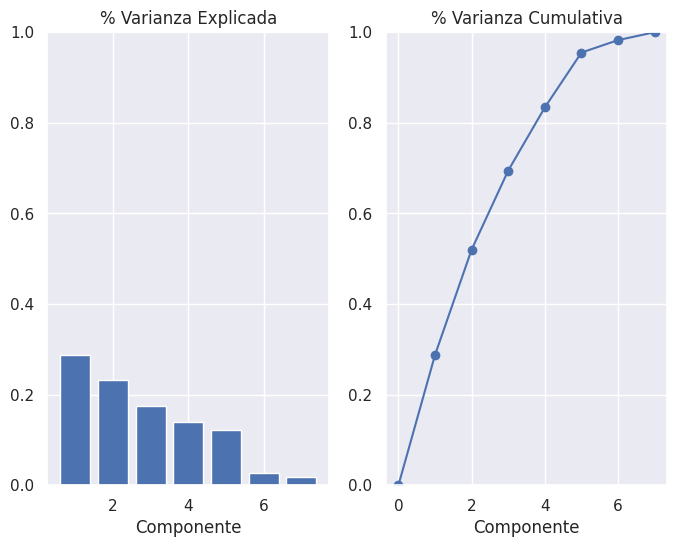

In [34]:
fig, axs = plt.subplots(1, 2)
n = pca.n_components_
grid = np.arange(1, n + 1)
# Varianza Explicada
axs[0].bar(grid, pca.explained_variance_ratio_)
axs[0].set(
    xlabel="Componente", title="% Varianza Explicada", ylim=(0.0, 1.0)
)
# Varianza Cumulativa
cv = np.cumsum(pca.explained_variance_ratio_)
axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
axs[1].set(
    xlabel="Componente", title="% Varianza Cumulativa", ylim=(0.0, 1.0)
)
fig.set(figwidth=8, dpi=100)

**Observaciones:**

* Se puede ver que la varianza de los datos se puede explicar mayormente con 5 de las componentes principales, por lo que en principio sería posible reducir la dimensionalidad de las 7 variables utilizadas como inputs. 
* Las componentes PC6 y PC7 casi no contribuyen a explicar la varianza de los datos y, en consecuencia, podrían ser despreciadas del análisis posterior. Notablemente, estas componentes están directamente relacionadas con los features numéricos en los que habíamos notado cierto grado de redundancia por medio de los análisis previos. De hecho, en la tabla de loadings se puede observar que el PC6 relaciona las variables *person_income*, *loan_amnt* y *loan_percent_income*, puesto que el peso de las demás variables es cercano a cero. Asimismo, se puede ver que el PC7 da cuenta de una fuerte relación entre *person_age* y *cb_person_cred_hist_length*. 


---
### **5. Feature Engineering y Preparación Final del Dataset**

A partir del análisis de PCA y de los argumentos previamente otorgados en relación al estudio de las correlaciones, de ahora en más se van a despreciar de la base de datos las variables *'loan_income'*, *'loan_amount'* y *'cb_person_cred_hist_length'*. Se afirma que tales variables no serán de utilidad para el entrenamiento de nuestros modelos:

In [35]:
important_features=["person_age",	"person_home_ownership",	"person_emp_length",	"loan_intent",	"loan_grade", "loan_int_rate",	"loan_status", "loan_percent_income",	"cb_person_default_on_file"]
data_red = data[important_features]
data_red.head()

,person_age,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file
1,21,OWN,5.0,EDUCATION,B,11.14,0,0.10,N
2,25,MORTGAGE,1.0,MEDICAL,C,12.87,1,0.57,N
3,23,RENT,4.0,MEDICAL,C,15.23,1,0.53,N
4,24,RENT,8.0,MEDICAL,C,14.27,1,0.55,Y
5,21,OWN,2.0,VENTURE,A,7.14,1,0.25,N



Asimismo, con el fin de lograr un dataset que resulte utilizable para los modelos de machine learning, se procede a realizar un encoding de las cuatro variables categóricas que se tienen. Dado que *'loan_grade'* da cuenta de un cierto orden preexistente en la calificación del riesgo crediticio, se procederá a utilizar *Ordinal Encoding* para esta variable, mientras que para el resto se utilizará *One-Hot Encoding*:

In [36]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
data_red_encoding = data_red.copy()
data_red_encoding['loan_grade'] = encoder.fit_transform(data_red[['loan_grade']])

categs= ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']
df_final = createdummies(data_red_encoding, categs)   ## Función createdummies definida en funcion_definitions.py
df_final.head()

,person_age,person_emp_length,loan_grade,loan_int_rate,loan_status,loan_percent_income,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_Y
1,21,5.0,1.0,11.14,0,0.10,0,1,0,1,0,0,0,0,0
2,25,1.0,2.0,12.87,1,0.57,0,0,0,0,0,1,0,0,0
3,23,4.0,2.0,15.23,1,0.53,0,0,1,0,0,1,0,0,0
4,24,8.0,2.0,14.27,1,0.55,0,0,1,0,0,1,0,0,1
5,21,2.0,0.0,7.14,1,0.25,0,1,0,0,0,0,0,1,0


In [37]:
df_final.shape

(32574, 15)

De este modo, **df_final** constituye la versión final de la base de datos que se utilizará para alimentar nuestros modelos de clasificación, con el objetivo de predecir la variable target *loan_status*. Dicho dataframe posee 32574 registros limpios distribuidos en 15 categorías distintas. 

### **6. Modelos de Machine Learning**

Se importan las principales librerías a usar:

In [38]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score, precision_score, recall_score, roc_auc_score, roc_curve 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

Se definen funciones clave para todos los modelos a utilizar:

A continuación, una breve descripción de todas las métricas a utilizar:

* **Accuracy**: Proporción entre los resultados verdaderos (tanto verdaderos positivos (TP) como verdaderos negativos (TN)) y el número total de casos examinados.

$$ \text{accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

* **Precision**: La precisión es la capacidad del modelo de no etiquetar como positiva una muestra que es negativa.

$$ \text{precision} = \frac{TP}{TP+FP} $$

* **Recall**: Tasa de Verdaderos Positivos (TP). Es la capacidad del modelo para encontrar todas las muestras positivas.

$$ \text{recall} = \frac{TP}{TP+FN} $$

* **F1-score**: $$ F_1 = 2 \frac{\text{precision * recall}}{\text{precision + recall}} $$ 

* **ROC-AUC score**: Las curvas ROC son una herramienta importante para 
evaluar el rendimiento de un modelo y se utilizan mayormente en problemas de clasificación binaria. La curva ROC muestra la relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos positivos (FPR) del modelo. El mejor modelo será aquel que logre, dado un cierto threshold, maximizar la TPR y minimizar al mismo tiempo la FPR. Esto es equivalente a pedir que el área bajo la curva (*AUC*, en inglés) sea máxima. 

Para continuar, se separa la variable a predecir y se normalizan los datos del input:

In [39]:
X = df_final.drop("loan_status", axis=1)
y = df_final.loan_status

# Normalizamos los datos
mm = MinMaxScaler()

for column in [list(set(X.columns))]:
    X[column] = mm.fit_transform(X[column])

X.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,32574.0,0.104303,0.083851,0.0,0.040541,0.081081,0.135135,1.0
person_emp_length,32574.0,0.116584,0.097116,0.0,0.048780,0.097561,0.170732,1.0
loan_grade,32574.0,0.203025,0.194397,0.0,0.000000,0.166667,0.333333,1.0
loan_int_rate,32574.0,0.314026,0.180866,0.0,0.138202,0.313233,0.451890,1.0
loan_percent_income,32574.0,0.205062,0.128620,0.0,0.108434,0.180723,0.277108,1.0
person_home_ownership_OTHER,32574.0,0.003285,0.057220,0.0,0.000000,0.000000,0.000000,1.0
person_home_ownership_OWN,32574.0,0.079327,0.270253,0.0,0.000000,0.000000,0.000000,1.0
person_home_ownership_RENT,32574.0,0.504758,0.499985,0.0,0.000000,1.000000,1.000000,1.0
loan_intent_EDUCATION,32574.0,0.198041,0.398530,0.0,0.000000,0.000000,0.000000,1.0
loan_intent_HOMEIMPROVEMENT,32574.0,0.110671,0.313729,0.0,0.000000,0.000000,0.000000,1.0


In [40]:
y.value_counts(normalize=True)

0    0.78182
1    0.21818
Name: loan_status, dtype: float64

**Detalle importante:** La distribución de nuestra variable a predecir se encuentra imbalanceada, por lo que habrá que hacer un tratamiento especial a la hora de separar los datos de entrenamiento y validación. Tal tratamiento consiste en estratificar los datos en la separación.

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42) 
y_test.value_counts(normalize=True)

0    0.781848
1    0.218152
Name: loan_status, dtype: float64

Notar que se conserva la distribución.

En las próximas subsecciones, se explorarán distintos modelos de machine learning supervisado. En cada subsección, el objetivo consistirá en buscar un conjunto de parámetros óptimos que maximice la performance del modelo. Se guardará el resultado de todas las métricas para cada modelo óptimizado, y sobre el final de la sección se compararán todos los modelos óptimos hallados.    

### **a. KNN (K-Nearest Neighbors)**

Se elige un rango de ***k*** vecinos para los cuales evaluaremos la performance del modelo:

In [42]:
neighbors = np.arange(1, 32, 2)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

Se entrena el modelo para cada valor de k, y se registra la exactitud de la predicción:

In [43]:
for i, k in enumerate(neighbors):
    model_KNN = KNeighborsClassifier(n_neighbors=k)
    model_KNN.fit(X_train, y_train)
    train_accuracy[i] = accuracy_score(y_train, model_KNN.predict(X_train))
    test_accuracy[i] = accuracy_score(y_test, model_KNN.predict(X_test))

Graficamos para evaluar la performance para  cada valor de k:

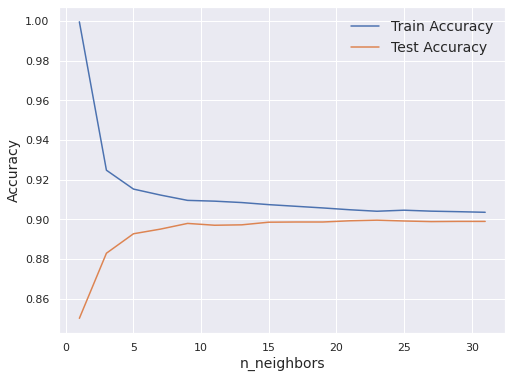

In [44]:
plt.plot(neighbors, train_accuracy, label = 'Train Accuracy')
plt.plot(neighbors, test_accuracy, label = 'Test Accuracy')
 
plt.legend(framealpha=0,fontsize=14)
plt.xlabel('n_neighbors',size=14)
plt.ylabel('Accuracy',size=14)
plt.show()

Se observa que para valores de ***k*** superiores a 10 la exactitud del modelo no mejora significativamente, pudiendo con ***k*** = 9 lograr predicciones con precisiones cercanas al 90% de los casos. No obstante, hallemos los parámetros óptimos usando el método de **Cross Validation:**

In [45]:
k_range = np.arange(1,31,1)
param_grid = {'n_neighbors':k_range}

CV_KNN = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid,scoring='accuracy')
CV_KNN.fit(X_train, y_train)

y_train_KNN = CV_KNN.best_estimator_.predict(X_train)
y_pred_KNN = CV_KNN.best_estimator_.predict(X_test)

In [46]:
print("El número de vecinos óptimos es: {}".format(CV_KNN.best_params_['n_neighbors']))
print("La precisión del modelo para los distintos datos es:")
## Función get_accuracy definida en function_definitions.py
print(get_accuracy(X_train, X_test, y_train, y_test, CV_KNN.best_estimator_))

El número de vecinos óptimos es: 17
La precisión del modelo para los distintos datos es:
{'test Accuracy': 0.8987005013813568, 'train Accuracy': 0.9066269023288452}


Y las métricas completas son:

In [47]:
probs_KNN_train = CV_KNN.best_estimator_.predict_proba(X_train)[:, 1]
probs_KNN_test = CV_KNN.best_estimator_.predict_proba(X_test)[:, 1]

## Función measure_errors definida en function_definitions.py
train_test_KNN_error = pd.concat([measure_errors(y_train, y_train_KNN,probs_KNN_train, 'train'),
                                 measure_errors(y_test, y_pred_KNN,probs_KNN_test, 'test')],
                                axis=1)

train_test_KNN_error

,train,test
accuracy,0.906627,0.898701
precision,0.934106,0.914971
recall,0.615477,0.590525
f1,0.742033,0.717788
auc,0.921308,0.858810


### **b. Árboles de decisión**

In [48]:
depth = np.arange(1,21,1)

train_test_accuracy_depths = []

for depth in depth:
    tree = DecisionTreeClassifier(max_depth = depth, random_state = 42) 

    tree.fit(X_train,y_train) 

    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test) 

    ## Función measure_error_depth definida en function_definitions.py
    train_test_accuracy_depth = pd.concat([measure_error_depth(y_train, y_train_pred, 'train',depth),
                              measure_error_depth(y_test, y_test_pred, 'test',depth)],
                              axis=1) 

    train_test_accuracy_depths.append(train_test_accuracy_depth) 

train_test_accuracy_depths = pd.concat(train_test_accuracy_depths,axis=0)
train_test_accuracy_depths.index.rename('Depth', inplace=True) 
train_test_accuracy_depths

,train,test
Depth,,
1,0.829525,0.829837
2,0.871190,0.869539
3,0.878997,0.882636
4,0.895180,0.896756
5,0.898952,0.900031
6,0.900969,0.900645
7,0.911495,0.909751
8,0.917328,0.911286
9,0.921670,0.910263


Se puede ver que en la medida en que se aumenta la profundidad del clasificador, la precisión en los datos de entrenamiento aumenta de manera monótona, mientras que en los datos de validación existe una profundidad crítica en la que la precisión comienza a decaer. Este es un signo de **overfitting**. Tal comportamiento parecería indicar que la profundidad óptima se encuentra alrededor de 8 y 9.

<Figure size 576x432 with 0 Axes>

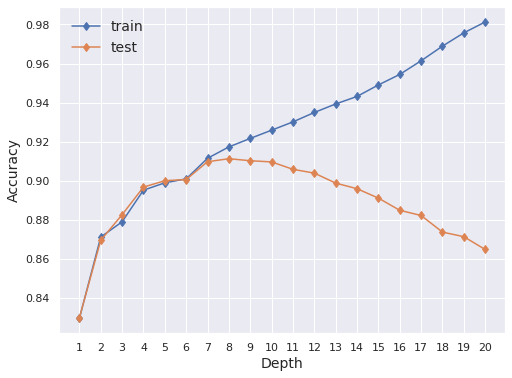

In [49]:
plt.figure()
ax = train_test_accuracy_depths.plot(marker='d')
ax.set_ylabel("Accuracy",fontsize=14)
ax.set_xlabel("Depth",fontsize=14)
ax.set_xticks(np.arange(1,21,1))
ax.legend(loc="best",framealpha=0,fontsize=14)
plt.show()

Ahora bien, veamos si podemos encontrar los parámetros óptimos del modelo usando el método de **Cross Validation**.

In [50]:
depth = np.arange(1,21,1)

param_grid = {'max_depth': depth,
              'max_features': np.arange(1, len(X.columns)+1)}

CV_trees = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy')

CV_trees = CV_trees.fit(X_train, y_train)

In [51]:
print("El número de nodos óptimos es {} y el número de estimadores óptimos es {}".format(CV_trees.best_estimator_.tree_.node_count, CV_trees.best_estimator_.tree_.max_depth))

El número de nodos óptimos es 335 y el número de estimadores óptimos es 9


**Observación:** Tal como habíamos estimado a mano, el mejor modelo posee 335 nodos y una profundidad igual a 9.

Calculemos ahora distintas métricas para dicho modelo:

In [52]:
y_train_trees = CV_trees.predict(X_train)
y_pred_trees = CV_trees.predict(X_test)

probs_trees_train = CV_trees.best_estimator_.predict_proba(X_train)[:, 1]
probs_trees_test = CV_trees.best_estimator_.predict_proba(X_test)[:, 1]

train_test_tree_error = pd.concat([measure_errors(y_train, y_train_trees,probs_trees_train, 'train'),
                                 measure_errors(y_test, y_pred_trees,probs_trees_test, 'test')],
                                axis=1)

train_test_tree_error

,train,test
accuracy,0.921670,0.910263
precision,0.967184,0.930089
recall,0.663518,0.636492
f1,0.787077,0.755778
auc,0.904922,0.870248


### **c. Random Forest**

El objetivo de esta subsección consiste en mejorar la precisión del modelo de árboles de decisión, utilizando un ensamble de los mismos. Comencemos construyendo un modelo de random forest arbitrario, compuesto por un ensamble de 10 estimadores de árboles de decisión diferentes. 

In [53]:
n_estimators=10

model_rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
model_rf.fit(X_train,y_train)

print(get_accuracy(X_train, X_test, y_train, y_test, model_rf))

{'test Accuracy': 0.9098536785019953, 'train Accuracy': 0.9858339546511118}


Esta precisión es menor que la hallada en el modelo de árboles de decisión simple de la subsección b. Por ello, intentemos mejorar el test accuracy buscando los parámetros óptimos con el método de **Cross Validation:**

In [54]:
model = RandomForestClassifier(random_state=42)

param_grid = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt"]}#, "log2"]}

CV_forest = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy')
CV_forest.fit(X_train, y_train)

y_train_forest = CV_forest.best_estimator_.predict(X_train)
y_pred_forest = CV_forest.best_estimator_.predict(X_test)
probs_forest_train = CV_forest.best_estimator_.predict_proba(X_train)[:, 1]
probs_forest_test = CV_forest.best_estimator_.predict_proba(X_test)[:, 1]

In [55]:
print(get_accuracy(X_train, X_test, y_train, y_test, CV_forest.best_estimator_))

{'test Accuracy': 0.9136396193594597, 'train Accuracy': 0.9440375422130608}


De este manera, se puede ver que se logró mejorar el test accuracy y el mismo supera el alcanzado previamente por un único estimador de árboles de decisión. Los parámetros óptimos encontrados son:

In [56]:
CV_forest.best_params_

{'max_depth': 15, 'max_features': 'auto', 'n_estimators': 31}

Y las métricas completas son:

In [57]:
train_test_forest_error = pd.concat([measure_errors(y_train, y_train_forest,probs_forest_train, 'train'),
                                 measure_errors(y_test, y_pred_forest,probs_forest_test, 'test')],
                                axis=1)

train_test_forest_error

,train,test
accuracy,0.944038,0.913640
precision,0.994916,0.949721
recall,0.747337,0.637899
f1,0.853535,0.763187
auc,0.987916,0.883905


### **d. Regresión Logística**

Entrenamos un modelo de regresión logística para predecir la probabilidad de incumplimiento de pago.

In [58]:
logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

Usando el modelo, predecimos la probabilidad para el estado del préstamo para los valores en *X_test*, y comparamos con los almacenados en la etiquetas de validación *y_test*.

In [59]:
probs_lr_train = logistic.predict_proba(X_train)
probs_lr = logistic.predict_proba(X_test)
y_train_logistic = logistic.predict(X_train)
y_pred_logistic = logistic.predict(X_test)

# Creamos dataframes para las predicciones y para los datos en test
preds_df = pd.DataFrame(probs_lr[:,1], columns = ['prob_default'])
true_df = y_test

# Concatenamos los datasets para compararlos
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

      loan_status  prob_default
0               0      0.031888
1               0      0.024424
2               0      0.084971
3               0      0.005248
4               1      0.936884
...           ...           ...
9768            0      0.120071
9769            0      0.273736
9770            0      0.084732
9771            1      0.137366
9772            1      0.037564

[9773 rows x 2 columns]


Pareciera que muchos de los registros que tienen *loan_status* = 0 tienen valores predichos más pequeños y los que tienen *loan_status* = 1 tienen valores predichos más cercanos a 1.

Vamos a evaluar qué tan preciso es nuestro modelo. A cada valor calculado por el modelo se le asigna 1 si es mayor que 0.5 y 0 si es menor. Luego, contamos la cantidad de registros a los que se asignó 0 o 1.

In [60]:
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda X: 1 if X > 0.5 else 0)
print(preds_df['loan_status'].value_counts())

0    8402
1    1371
Name: loan_status, dtype: int64


Construimos un reporte con las principales métricas de clasificación.

In [61]:
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.87      0.95      0.91      7641
     Default       0.74      0.48      0.58      2132

    accuracy                           0.85      9773
   macro avg       0.80      0.71      0.74      9773
weighted avg       0.84      0.85      0.84      9773



Y las métricas completas son:

In [62]:
measure_errors(y_test, y_pred_logistic,probs_lr[:,1], 'Log Reg')

accuracy     0.849279
precision    0.740336
recall       0.476079
f1           0.579503
auc          0.843478
Name: Log Reg, dtype: float64

In [63]:
train_test_lr_error = pd.concat([measure_errors(y_train, y_train_logistic,probs_lr_train[:,1], 'train'),
                                 measure_errors(y_test, y_pred_logistic,probs_lr[:,1], 'test')],
                                axis=1)

train_test_lr_error

,train,test
accuracy,0.851410,0.849279
precision,0.744229,0.740336
recall,0.486030,0.476079
f1,0.588035,0.579503
auc,0.855153,0.843478


### **e. SVM**

Entrenamos un modelo de support vector machine para predecir la probabilidad de incumplimiento de pago.

In [64]:
# Creación del modelo SVM 
modelo_svm = SVC(C = 100, kernel = 'linear', random_state=42)
modelo_svm.fit(X_train, y_train)

print(get_accuracy(X_train, X_test, y_train, y_test, modelo_svm))

{'test Accuracy': 0.850199529315461, 'train Accuracy': 0.8525064690145169}


Veamos si podemos mejorar esta precisión con el método de **Cross Validation**:

In [65]:
model_SVM = SVC(random_state=42,probability=True)

params_grid = {
    'C': [10,100,200],
    'kernel': ['rbf','linear']#,poly, 'sigmoid']
}

CV_SVM = GridSearchCV(estimator=model_SVM, param_grid=params_grid,scoring='accuracy')
CV_SVM.fit(X_train, y_train)

y_train_SVM = CV_SVM.best_estimator_.predict(X_train)
y_pred_SVM = CV_SVM.best_estimator_.predict(X_test)
probs_SVM_train = CV_SVM.best_estimator_.predict_proba(X_train)[:, 1]
probs_SVM = CV_SVM.best_estimator_.predict_proba(X_test)[:, 1]

print(get_accuracy(X_train, X_test, y_train, y_test, CV_SVM.best_estimator_))

{'test Accuracy': 0.9052491558375115, 'train Accuracy': 0.911802113942371}


Los parámetros óptimos son:

In [66]:
CV_SVM.best_params_

{'C': 200, 'kernel': 'rbf'}

Y las métricas completas son:

In [67]:
measure_errors(y_test, y_pred_SVM,probs_SVM, 'SVM')

accuracy     0.905249
precision    0.927660
recall       0.613508
f1           0.738566
auc          0.840655
Name: SVM, dtype: float64

In [68]:
train_test_svm_error = pd.concat([measure_errors(y_train, y_train_SVM,probs_SVM_train, 'train'),
                                 measure_errors(y_test, y_pred_SVM,probs_SVM, 'test')],
                                axis=1)

train_test_svm_error

,train,test
accuracy,0.911802,0.905249
precision,0.937168,0.927660
recall,0.638593,0.613508
f1,0.759594,0.738566
auc,0.867427,0.840655


### **f. Comparación de modelos óptimos**

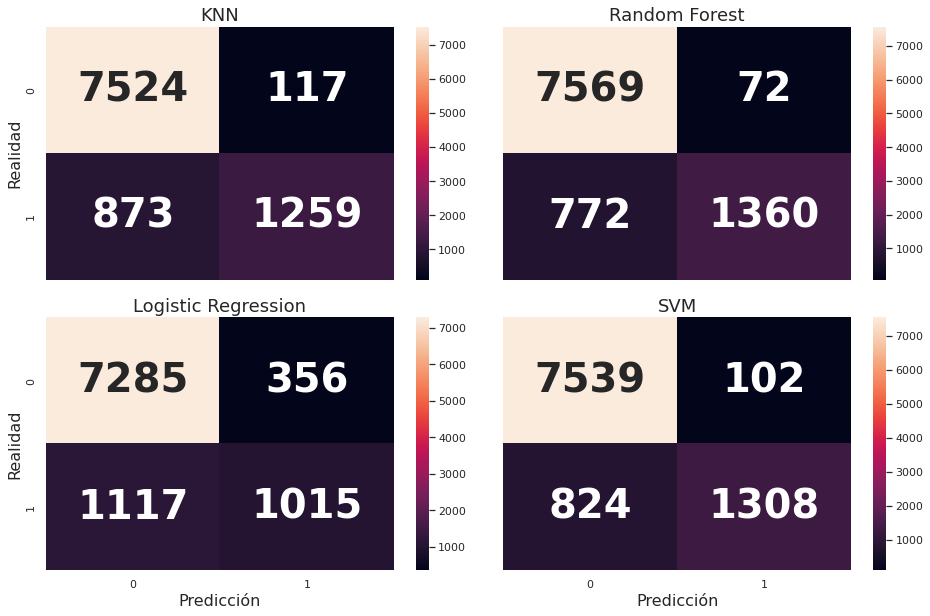

In [69]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))
axes = axes.flatten()
sns.heatmap(confusion_matrix(y_test, y_pred_KNN), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"},ax=axes[0])  
sns.heatmap(confusion_matrix(y_test, y_pred_forest), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"},ax=axes[1])  
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"},ax=axes[2])  
sns.heatmap(confusion_matrix(y_test, y_pred_SVM), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"},ax=axes[3])  
axes[0].get_xaxis().set_visible(False)
axes[1].get_xaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)
axes[3].get_yaxis().set_visible(False)
axes[0].set_title("KNN",fontsize=18)
axes[1].set_title("Random Forest",fontsize=18)
axes[2].set_title("Logistic Regression",fontsize=18)
axes[3].set_title("SVM",fontsize=18)
axes[0].set_ylabel('Realidad', fontsize=16)
axes[1].set_ylabel('Realidad', fontsize=16)
axes[2].set_ylabel('Realidad', fontsize=16)
axes[3].set_ylabel('Realidad', fontsize=16)
axes[2].set_xlabel('Predicción', fontsize=16)
axes[3].set_xlabel('Predicción', fontsize=16)
plt.subplots_adjust(wspace=0.05,hspace=0.15)
plt.show()

Se puede ver que todos los modelos presentan una mayor proporción de falsos negativos que falsos positivos. Esto seguramente se debe a que la clase a predecir se encuentra desbalanceada. De cualquier modo, el modelo que minimiza los términos fuera de la diagonal es el de Random Forest. 

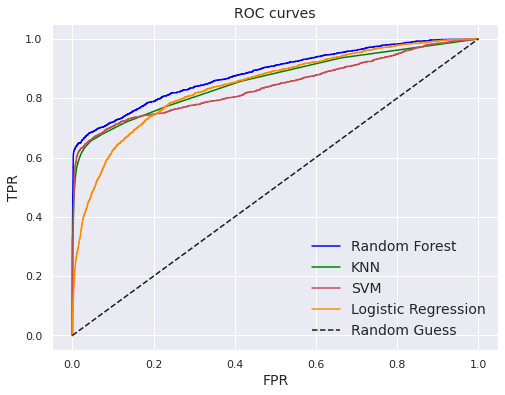

In [70]:
rand_guess = np.linspace(0,1,200)

fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, probs_KNN_test)
fpr_forest, tpr_forest, thresholds_lr = roc_curve(y_test, probs_forest_test)
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, probs_lr[:, 1])
fpr_SVM, tpr_SVM, thresholds_SVM = roc_curve(y_test, probs_SVM)

fig, ax = plt.subplots()
ax.plot(fpr_forest, tpr_forest, color = 'blue', label="Random Forest")
ax.plot(fpr_KNN, tpr_KNN, color = 'green', label="KNN")
ax.plot(fpr_SVM, tpr_SVM, color = 'r',label="SVM")
ax.plot(fpr_lr, tpr_lr, color = 'darkorange', label="Logistic Regression")
ax.plot(rand_guess,rand_guess,'k--',label="Random Guess")
ax.set_xlabel('FPR',size=14)
ax.set_ylabel('TPR',size=14)
ax.legend(loc="best",framealpha=0,fontsize=14)
ax.set_title("ROC curves",size=14)
plt.show()

Nuevamente, el modelo que maximiza el área bajo la curva entre la curva ROC y la correspondiente a una estimación aleatoria es el modelo de Random Forest. 

In [71]:
test_errors = pd.concat([measure_errors(y_test, y_pred_trees,probs_trees_test, 'Árboles decision'),
                         measure_errors(y_test, y_pred_forest,probs_forest_test, 'Random Forest'),
                         measure_errors(y_test, y_pred_KNN, probs_KNN_test, 'KNN'),
                         measure_errors(y_test, y_pred_logistic,probs_lr[:,1], 'Log Reg'),
                         measure_errors(y_test, y_pred_SVM, probs_SVM, 'SVM')],
                                axis=1)
test_errors

,Árboles decision,Random Forest,KNN,Log Reg,SVM
accuracy,0.910263,0.913640,0.898701,0.849279,0.905249
precision,0.930089,0.949721,0.914971,0.740336,0.927660
recall,0.636492,0.637899,0.590525,0.476079,0.613508
f1,0.755778,0.763187,0.717788,0.579503,0.738566
auc,0.870248,0.883905,0.858810,0.843478,0.840655


**Conclusión preliminar:** Es evidente que el modelo de Random Forest resulta superior en todas las métricas analizadas. Asimismo, se cree que las predicciones halladas en todos los casos podrían mejorar si se implementara algún método para balancear los datos de la clase a predecir, ya sea con un *undersampling* de la clase negativa, un *oversampling* de la clase positiva o un punto medio entre los dos sampleos.

### **g. Mejora del modelo óptimo: Gradient Boosting**

Mientras que en la técnica de Random Forest los árboles de decisión son creados y agregados de manera independiente, también es posible construir tales estimadores de forma consecutiva, intentando que el estimador nuevo mejore las falencias del estimador anterior. En términos matemáticos, lo que se busca es que cada estimador nuevo permita seguir minimizando el gradiente de la función de costo, lo que le otorga a este método el nombre de *Gradient Boosting*. Si bien existen múltiples implementaciones distintas de *Gradient Boosting*, en este trabajo nos enfocaremos en tres de ellas y veremos si las predicciones obtenidas superan al modelo óptimo hallado de Random Forest. 

- **GradientBoostingClassifier:**

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid_GBC = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10)],
             'max_features':["auto", "sqrt"]#, "log2"]}
              }

CV_GBC = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                      param_grid=param_grid_GBC, 
                      scoring='accuracy',
                      n_jobs=-1)

CV_GBC = CV_GBC.fit(X_train, y_train)

CV_GBC.best_params_

{'max_depth': 7, 'max_features': 'auto', 'n_estimators': 23}

In [73]:
y_train_GBC = CV_GBC.best_estimator_.predict(X_train)
y_pred_GBC = CV_GBC.best_estimator_.predict(X_test)
probs_GBC_train = CV_GBC.best_estimator_.predict_proba(X_train)[:, 1]
probs_GBC = CV_GBC.best_estimator_.predict_proba(X_test)[:, 1]

train_test_GBC_error = pd.concat([measure_errors(y_train, y_train_GBC,probs_GBC_train, 'train'),
                                 measure_errors(y_test, y_pred_GBC,probs_GBC, 'test')],
                                axis=1)

train_test_GBC_error

,train,test
accuracy,0.923249,0.915993
precision,0.986425,0.969892
recall,0.657286,0.634615
f1,0.788902,0.767224
auc,0.915117,0.884649


- **AdaBoostClassifier:**
Este método se conoce como Adaptative Boosting y comienza entrenando un clasificador en el dataset original, a partir del cual entrena copias adicionales de este clasificador en el mismo dataset pero donde los pesos de las instancias que se clasificaron erróneamente son ajustados tal que los clasificadores siguientes se focalicen en los casos más complicados. Resulta importante destacar que Adaboost suele ser muy sensible a los outliers. 

In [74]:
from sklearn.ensemble import AdaBoostClassifier

bmodel=RandomForestClassifier(max_depth=15, n_estimators=31, max_features='auto')

param_grid_ADA = {'learning_rate': [0.1*(n+1) for n in range(5)],
             'n_estimators' : [2*n+1 for n in range(10)]}#,
#              'algorithm':['SAMME'#, 'SAMME.R']}         

CV_ADA = GridSearchCV(AdaBoostClassifier(base_estimator=bmodel, 
                                         random_state=42), 
                                         param_grid=param_grid_ADA,
                                         scoring='accuracy',
                                         n_jobs=-1)

CV_ADA = CV_ADA.fit(X_train, y_train)

CV_ADA.best_params_

{'learning_rate': 0.2, 'n_estimators': 13}

In [75]:
y_train_ADA = CV_ADA.best_estimator_.predict(X_train)
y_pred_ADA = CV_ADA.best_estimator_.predict(X_test)
probs_ADA_train = CV_ADA.best_estimator_.predict_proba(X_train)[:, 1]
probs_ADA = CV_ADA.best_estimator_.predict_proba(X_test)[:, 1]

train_test_ADA_error = pd.concat([measure_errors(y_train, y_train_ADA,probs_ADA_train, 'train'),
                                 measure_errors(y_test, y_pred_ADA,probs_ADA, 'test')],
                                axis=1)

train_test_ADA_error

,train,test
accuracy,0.958379,0.914970
precision,0.999008,0.957133
recall,0.810050,0.638837
f1,0.894661,0.766245
auc,0.999504,0.884532


- **XGBClassifier:**

In [76]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42)

param_grid_XGB = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10)],
             'max_features':["auto", "sqrt"]#, "log2"]}
             }

CV_XGB = GridSearchCV(xgb_model, param_grid=param_grid_XGB)

CV_XGB = CV_XGB.fit(X_train, y_train)

CV_XGB.best_params_

{'max_depth': 7, 'max_features': 'auto', 'n_estimators': 35}

In [77]:
y_train_XGB = CV_XGB.best_estimator_.predict(X_train)
y_pred_XGB = CV_XGB.best_estimator_.predict(X_test)
probs_XGB_train = CV_XGB.best_estimator_.predict_proba(X_train)[:, 1]
probs_XGB = CV_XGB.best_estimator_.predict_proba(X_test)[:, 1]

train_test_XGB_error = pd.concat([measure_errors(y_train, y_train_XGB,probs_XGB_train, 'train'),
                                 measure_errors(y_test, y_pred_XGB,probs_XGB, 'test')],
                                axis=1)

train_test_XGB_error

,train,test
accuracy,0.922942,0.915993
precision,0.986691,0.967880
recall,0.655678,0.636023
f1,0.787828,0.767620
auc,0.919491,0.885722


**Comparación de modelos de boosting con respecto a Random Forest:**

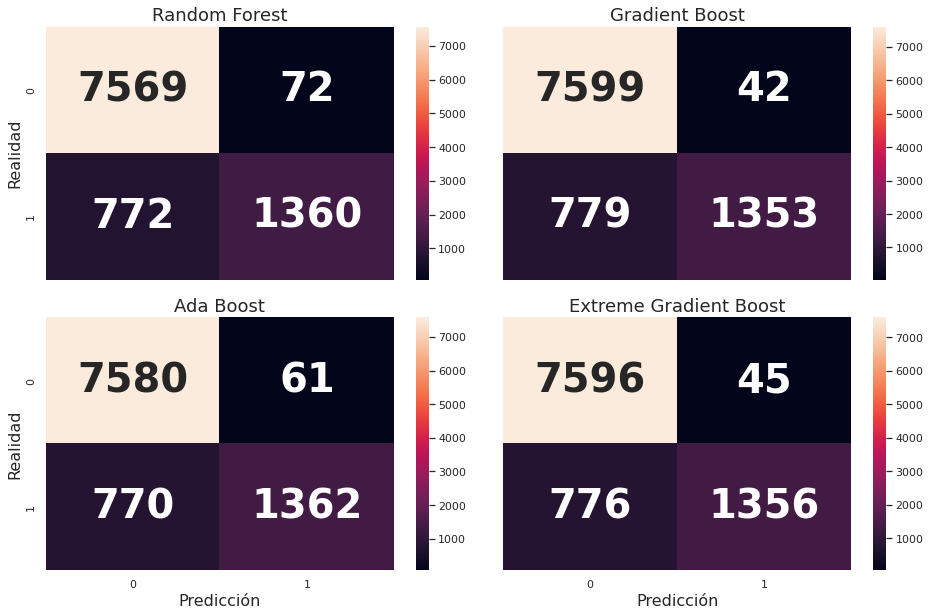

In [78]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))
axes = axes.flatten()
sns.heatmap(confusion_matrix(y_test, y_pred_forest), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"},ax=axes[0])  
sns.heatmap(confusion_matrix(y_test, y_pred_GBC), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"},ax=axes[1])  
sns.heatmap(confusion_matrix(y_test, y_pred_ADA), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"},ax=axes[2])  
sns.heatmap(confusion_matrix(y_test, y_pred_XGB), annot=True, fmt='d', annot_kws={"size": 40, "weight": "bold"},ax=axes[3])  
axes[0].get_xaxis().set_visible(False)
axes[1].get_xaxis().set_visible(False)
axes[1].get_yaxis().set_visible(False)
axes[3].get_yaxis().set_visible(False)
axes[0].set_title("Random Forest",fontsize=18)
axes[1].set_title("Gradient Boost",fontsize=18)
axes[2].set_title("Ada Boost",fontsize=18)
axes[3].set_title("Extreme Gradient Boost",fontsize=18)
axes[0].set_ylabel('Realidad', fontsize=16)
axes[2].set_ylabel('Realidad', fontsize=16)
axes[2].set_xlabel('Predicción', fontsize=16)
axes[3].set_xlabel('Predicción', fontsize=16)
plt.subplots_adjust(wspace=0.05,hspace=0.15)
plt.show()

El modelo de ADA Boost es el único modelo de boosting que logra disminuir la proporción de falsos negativos con respecto al modelo de Random Forest, lo cual lo convierte en el estimador óptimo en términos de las características del negocio crediticio. Sostenemos que siempre es mejor sobreestimar los casos positivos (tener mayor cantidad de falsos positivos), que no ser capaz de detectar todos los verdaderos positivos y predecir erróneamente que un cliente no va a defaultear, cuando en realidad lo hace (falsos negativos). En otras palabras, resulta más riesgoso para el negocio no estar preparado para tales pérdidas y no contar con las reservas necesarias para enfrentarlas, que el hecho de dar menor cantidad de préstamos y, en consecuencia, ganar menos dinero. Se destaca que luego de la crisis financiera del 2008, hoy en día las instituciones financieras deben cumplir regulaciones muy estrictas a la hora de prestar dinero, por lo que las mismas buscan constantemente minimizar y/o atenuar el riesgo, manteniendo un nivel de reservas adecuado. 

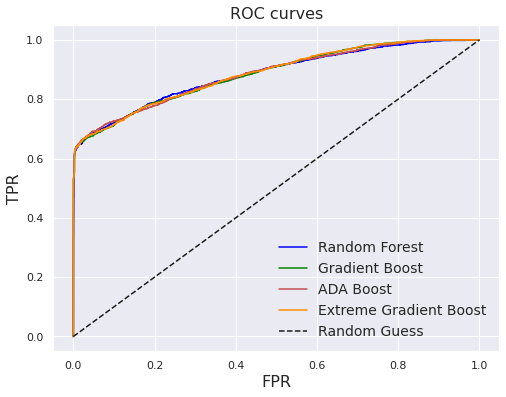

In [79]:
rand_guess = np.linspace(0,1,200)

fpr_forest, tpr_forest, thresholds_lr = roc_curve(y_test, probs_forest_test)
fpr_GBC, tpr_GBC, thresholds_GBC = roc_curve(y_test, probs_GBC)
fpr_ADA, tpr_ADA, thresholds_ADA = roc_curve(y_test, probs_ADA)
fpr_XGB, tpr_XGB, thresholds_XGB = roc_curve(y_test, probs_XGB)

fig, ax = plt.subplots()
ax.plot(fpr_forest, tpr_forest, color = 'blue', label="Random Forest")
ax.plot(fpr_GBC, tpr_GBC, color = 'green', label="Gradient Boost")
ax.plot(fpr_ADA, tpr_ADA, color = 'r',label="ADA Boost")
ax.plot(fpr_XGB, tpr_XGB, color = 'darkorange', label="Extreme Gradient Boost")
ax.plot(rand_guess,rand_guess,'k--',label="Random Guess")
ax.set_xlabel('FPR',fontsize=16)
ax.set_ylabel('TPR',fontsize=16)
ax.legend(loc="best",framealpha=0,fontsize=14)
ax.set_title("ROC curves",fontsize=16)
plt.show()

Las curvas ROC no logran detectar diferencias significativas entre los modelos de Boosting y el modelo de Random Forest, por lo que la matriz de confusión resulta una herramienta más adecuada para realizar la comparación en este caso. Por otro lado, el conjunto completo de métricas para todos estos modelos es el siguiente:

In [80]:
test_errors_opt = pd.concat([measure_errors(y_test, y_pred_forest,probs_forest_test, 'Random Forest'),
                         measure_errors(y_test, y_pred_GBC, probs_GBC, 'Gradient Boost'),
                         measure_errors(y_test, y_pred_ADA,probs_ADA, 'Ada Boost'),
                         measure_errors(y_test, y_pred_XGB, probs_XGB, 'XGB')],
                                axis=1)
test_errors_opt

,Random Forest,Gradient Boost,Ada Boost,XGB
accuracy,0.913640,0.915993,0.914970,0.915993
precision,0.949721,0.969892,0.957133,0.967880
recall,0.637899,0.634615,0.638837,0.636023
f1,0.763187,0.767224,0.766245,0.767620
auc,0.883905,0.884649,0.884532,0.885722


**Conclusión final:** En líneas generales, se puede ver que todos los algoritmos de boosting logran superar levemente al modelo de Random Forest. No obstante, como ya se argumentó, dadas las características propias del negocio, resulta deseable minimizar la proporción de falsos negativos y por tal motivo se concluye que el mejor estimador es el modelo de **Ada Boost**. Como trabajo futuro, se le propondrá a la gerencia implementar otros modelos para estimar no solo la probabilidad de default, sino también las pérdidas ante el default y la exposición frente al default. Además, con el fin de mejorar las métricas, se propondrá explorar un conjunto más diverso y actual de algoritmos, incluyendo aprendizaje profundo y redes neuronales. 
